# EDA of Hotel Booking's Demand 

This project aims to create meaningful estimators from the data set we have and to perform Exploratory Data Analysis so that if anyone who wishes to proceed with the Machine Learning Model, can do so.

This data set contains a single file that compares various booking information between two hotels: a city hotel and a resort hotel. Both hotels are located in Portugal (southern Europe) (“H1 at the resort region of Algarve and H2 at the city of Lisbon”).

This dataset can be downloaded from [HERE](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

The tools for data analysis used in this project are the packages Numpy and Pandas, and to visualize and explore the data: Matplotlib and Seaborn.

We try to answer these questions:


1.  **Where do the maximum number of  guests come from?**
2.  **How much do guests pay for a room per night?**
3.  **How does the price per night vary over the year?**
4.  **How many bookings were canceled, and which month had the highest number of cancellations?** 
5.  **In which hotel people like to stay and spend more time.**
6.  **Which was the most booked accommodation type (Single, Couple, Family)**
7.  **Which are the busiest months for hotel bookings?**
8.  **Is there a repeated guest effect on cancellations?**
9.  **What is the relationship between the number of nights spent at hotels and booking types (resort vs. city)?**
10.  **How does the deposit affect cancellations, and is there a difference by market segment?**

Let's start. 

#### Import all necessary libraries

In [2]:
import pandas as pd  # Used for data manipulation and analysis
import numpy as np  # Used for scientific computing
import matplotlib.pyplot as plt  # Used for plotting graphs
import seaborn as sns  # Used for plotting graphs
import re  # Used for regular expression

palette = sns.color_palette("Oranges_r")


Let's import and display the data set.

In [3]:
# Read the dataset into a dataframe named data
data = pd.read_csv("../Hotels_Analysis/dataset/hotel_bookings.csv")


In [4]:
# Let's see number of rows and columns in our dataset
data.shape


(119390, 32)

So we have 119390 rows and 32 columnsm, which is a lot of data to work with.

#### Let's see first few rows of the data set.

In [5]:
# Display top 5 rows of the table.
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Data Pre-processing

Let's copy our dataset so that our original dataset remains unchanged. 

In [6]:
# Copy the dataset
df = data.copy()

Let's clean our column names by removing spaces and making them lowercase.

In [7]:
# Clean column names
df.columns = [re.sub(r"([A-Z])", r"_\1", col).lower() for col in df.columns]

Let's check for missing values in our dataset.

In [8]:
# Let's check for null values and there percentage in each column
# Also as we have too many columns, let's sort the columns in descending order of percentage of null values

null_value = pd.DataFrame(
    {
        "Null Values": df.isna().sum(),
        "Percentage Null Values": (df.isna().sum()) / (df.shape[0]) * (100),
    }
)
null_value.sort_values(by="Percentage Null Values", ascending=False)[:10]


,Null Values,Percentage Null Values
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


So we do have null values in our dataset. Let's try to handle them  <br />

In the `agent` and the `company` column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [9]:
# Replace missing values in `agent` and `company` columns with 0.0`
df[["agent", "company"]] = df[["agent", "company"]].fillna(0.0)

`Children` column contains the count of children, so we will replace all the missing values with the rounded mean value.

In [10]:
# Replace the null values in Children column with the mean.
df["children"].fillna(round(data.children.mean()), inplace=True)


As `Country` column is a catagorical column, we will replace the missing values with the most frequent country, or **MODE**. Mode is the value that appears most frequently in a data set.

In [11]:
# Replace missing values in the country column with the mode.
df["country"].fillna(data.country.mode().to_string(), inplace=True)

In [12]:
# Check the data with no adults, no children and no babies
df[(df.adults + df.children + df.babies) == 0].shape

(180, 32)

Filter out rows with zero adults, children, and babies, indicating unbooked rooms

In [13]:
# Drop the data with no adults, no children and no babies
df.drop(df[(df.adults + df.children + df.babies) == 0].index, inplace=True)

#### Data types

In [14]:
# Let's check the data types of each column
dtypes = pd.DataFrame({"Dtypes": df.dtypes})
dtypes


,Dtypes
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


We can observe that, there are some columns like `Children`, `Company`, and `Agent`, that are float type but their values are only in integers. So we will convert them to the integer type.

In [15]:
# Convert the datatype of Childern, Company and Agent from float to int
df[["children", "company", "agent"]] = df[["children", "company", "agent"]].astype(
    "int64"
)

# Let's move on to EDA

Q. **Where do the maximum number of guests come from?**

In [16]:
# Find the top 10 countries with the highest number of customers
top_countries_customers_count = df["country"].value_counts().head(5)
top_countries_customers_count


country
PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
Name: count, dtype: int64

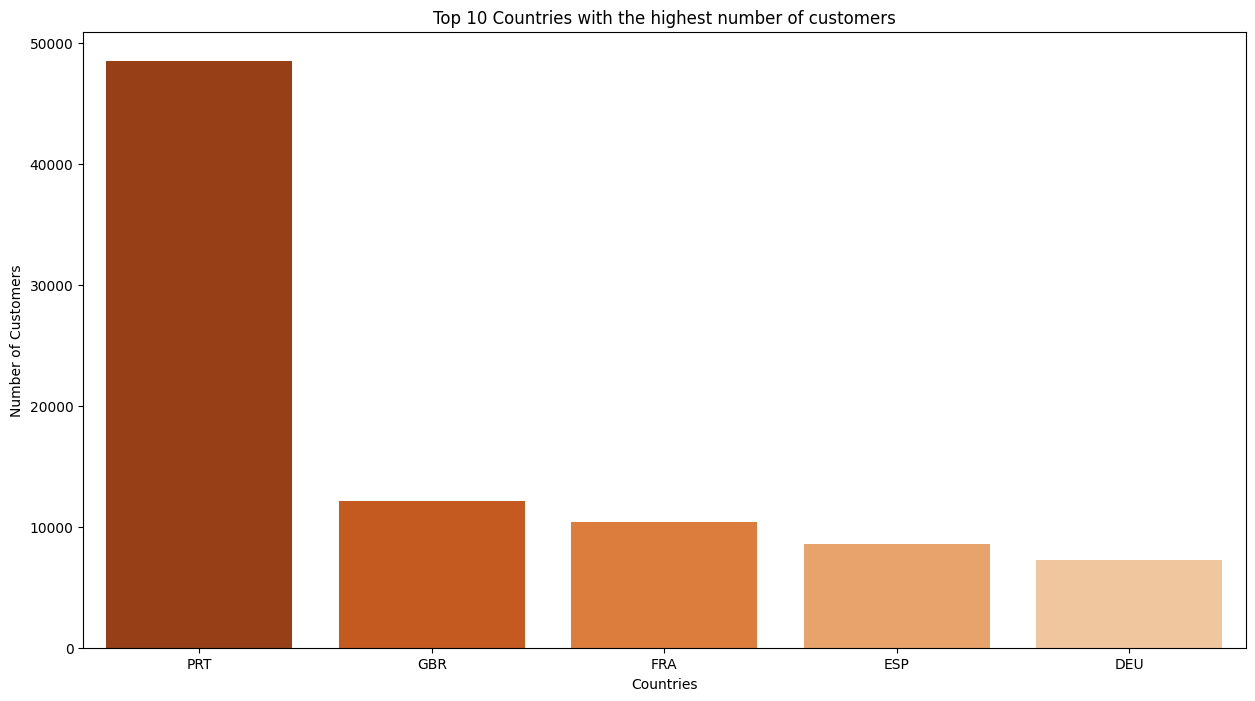

In [17]:
# Let's plot the top countries with the highest number of customers
plt.figure(figsize=(15, 8))
sns.barplot(
    x=top_countries_customers_count.index,
    y=top_countries_customers_count.values,
    palette=palette,
)
plt.xlabel("Countries")
plt.ylabel("Number of Customers")
plt.title("Top 10 Countries with the highest number of customers")
plt.show()


According to the above graph, we can see that most of the guests are from: <br />

`PRT` - Portugal

`GBR` - United Kingdom

`FRA` - France

`ESP` - Spain

`DEU` - Germany

Q. **How much do guests pay for a room per night?**

Let's check out the price paid (in one night) by the guests who are staying in these hotels. Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.  <br />

In [18]:
# Let's create a resort column to find the number of customers who booked a resort hotel and who booked a city hotel

resort_hotel = df.loc[(df["hotel"] == "Resort Hotel")
                      & (df["is_canceled"] == 0)]
city_hotel = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

As we have babies too in our dataset, let's remove them from adr calculation.

In [38]:
# Calculate the Average Daily Rate (ADR) per paying guest (excluding babies) for resort hotel
resort_hotel.loc[:, "adr_per_paying_guest"] = resort_hotel["adr"] / (
    resort_hotel["adults"] + resort_hotel["children"]
)

# Calculate the Average Daily Rate (ADR) per paying guest (excluding babies) for city hotel
city_hotel.loc[:, "adr_per_paying_guest"] = city_hotel["adr"] / (
    city_hotel["adults"] + city_hotel["children"]
)


Let's print out the mean values from both the data frames.

In [20]:
# Calculate and display the average nightly rates per person for non-canceled bookings.
print(
    "For all non-canceled reservations, encompassing various room types and meal plans:"
)
print(
    f"Resort Hotel: Average nightly rate per person is €{resort_hotel['adr_per_paying_guest'].mean():.2f}."
)
print(
    f"City Hotel: Average nightly rate per person is €{city_hotel['adr_per_paying_guest'].mean():.2f}."
)


For all non-canceled reservations, encompassing various room types and meal plans:
Resort Hotel: Average nightly rate per person is €47.49.
City Hotel: Average nightly rate per person is €59.27.


Normalize the Average Daily Rate (ADR) to account for the varying number of guests, ensuring a fair comparison.


In [21]:
# Calculate the normalized Average Daily Rate (ADR) per guest by dividing ADR by the total number of guests (adults + children).
df["adr_per_paying_guest"] = df["adr"] / (df["adults"] + df["children"])

# Filter the dataset to include only non-canceled bookings.
non_canceled_bookings = df[df["is_canceled"] == 0]

# Display the resulting DataFrame containing non-canceled bookings.
non_canceled_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_per_paying_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


In [22]:
# Selecting data for actual guests, sorting by reserved room type
guests_room_prices = non_canceled_bookings[
    ["hotel", "reserved_room_type", "adr_per_paying_guest"]
].sort_values("reserved_room_type")
guests_room_prices


,hotel,reserved_room_type,adr_per_paying_guest
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40
...,...,...,...
24110,Resort Hotel,H,34.00
354,Resort Hotel,L,37.50
15855,Resort Hotel,L,86.00
911,Resort Hotel,L,100.00


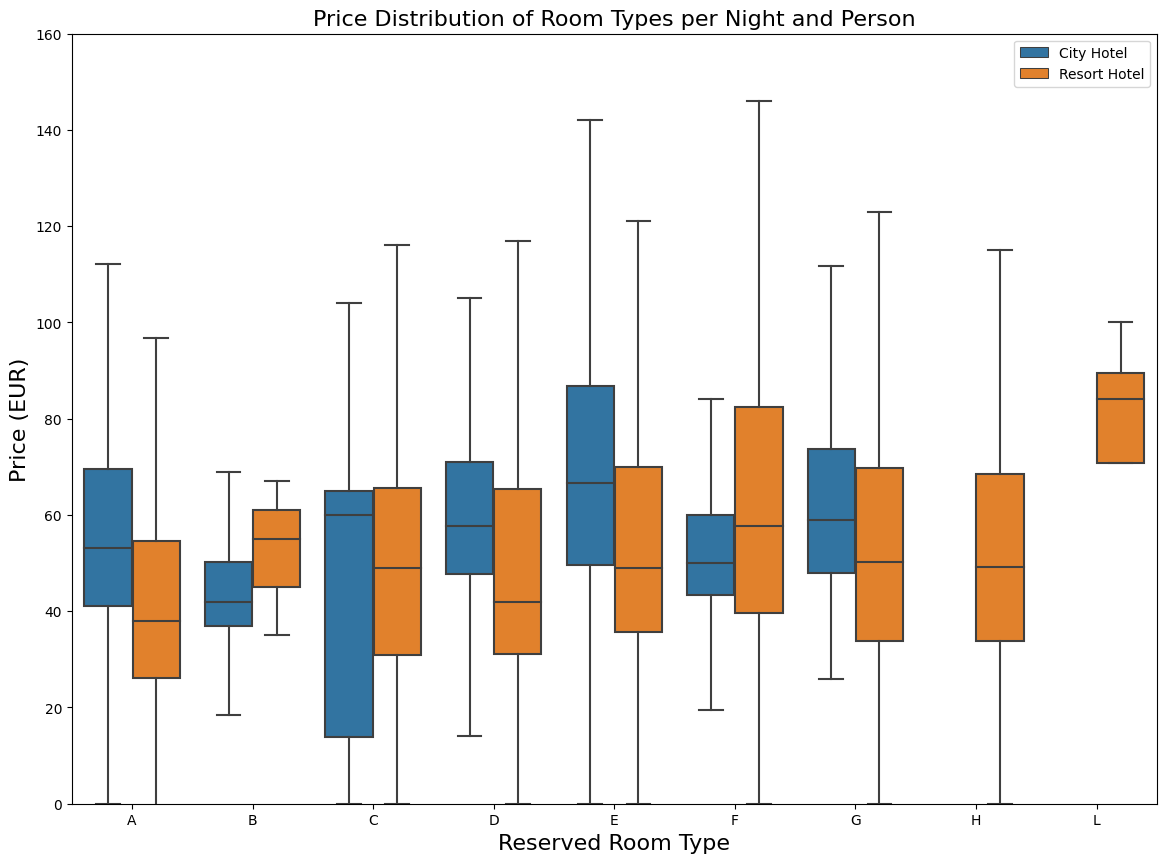

In [23]:
# Create a boxplot to visualize room prices per night and person by room type and hotel
plt.figure(figsize=(14, 10))

sns.boxplot(
    x="reserved_room_type",
    y="adr_per_paying_guest",
    hue="hotel",
    data=guests_room_prices,
    hue_order=["City Hotel", "Resort Hotel"],
    fliersize=0,
)

plt.title("Price Distribution of Room Types per Night and Person", fontsize=16)
plt.xlabel("Reserved Room Type", fontsize=16)
plt.ylabel("Price (EUR)", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()


This figure shows the average price per room, depending on its type, and the standard deviation. <br/>
Note that due to data anonymization, rooms with the same type letter may not necessarily be the same across hotels.


Q. **How does the price per night vary over the year?**

In [24]:
# Select relevant columns and sort by arrival_date_month
room_price_monthly = non_canceled_bookings[
    ["hotel", "arrival_date_month", "adr_per_paying_guest"]
].sort_values("arrival_date_month")


# Let's order the months by their logical order
ordered_months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
room_price_monthly["arrival_date_month"] = pd.Categorical(
    room_price_monthly["arrival_date_month"], categories=ordered_months, ordered=True
)

room_price_monthly


,hotel,arrival_date_month,adr_per_paying_guest
48869,City Hotel,April,81.90
110755,City Hotel,April,115.00
110756,City Hotel,April,57.50
110757,City Hotel,April,65.25
110758,City Hotel,April,65.25
...,...,...,...
43535,City Hotel,September,47.25
43534,City Hotel,September,0.00
43533,City Hotel,September,31.00
43577,City Hotel,September,45.00


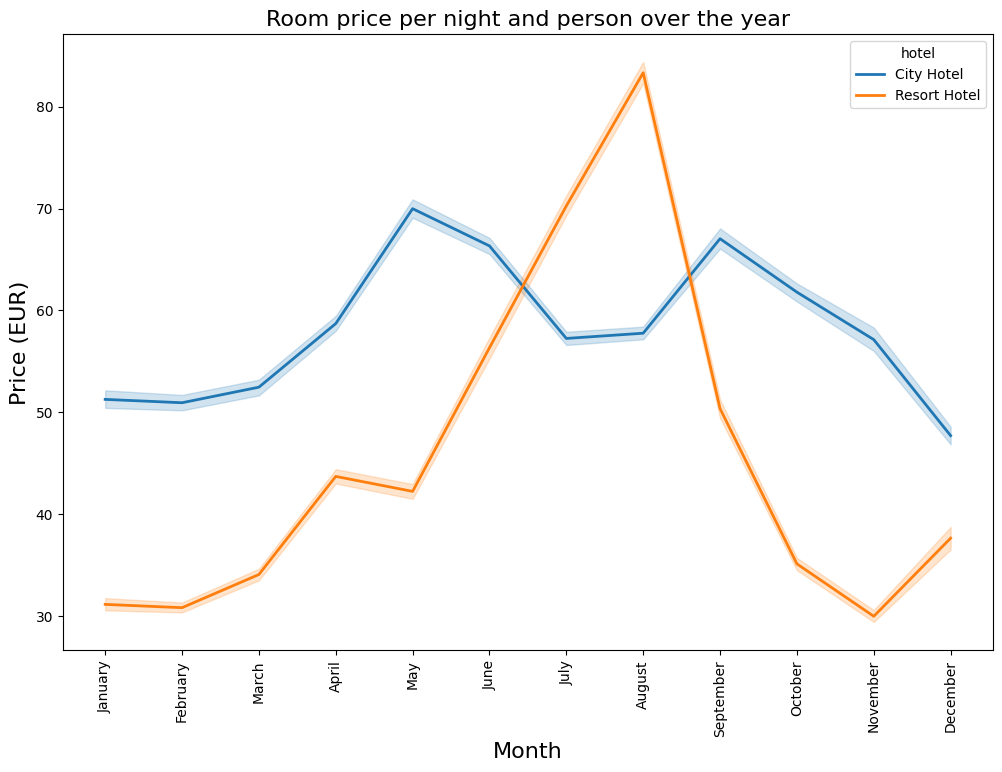

In [25]:
# Let's plot a line graph to visualize the average price per night and person over the months
plt.figure(figsize=(12, 8))
sns.lineplot(
    x="arrival_date_month",
    y="adr_per_paying_guest",
    hue="hotel",
    data=room_price_monthly,
    hue_order=["City Hotel", "Resort Hotel"],
    err_style="band",
    size="hotel",
    sizes=(2, 2),
)
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Price (EUR)", fontsize=16)
plt.show()

The average price of a resort hotel in Europe is significantly higher during the month of August, when the summer season is in full swing. The average price of a city hotel varies less throughout the year, but is most expensive during the spring (May) and autumn (September) seasons. <br />
The average prices for both city hotels and resort hotels in Europe are lowest during the months of October, November, December, January, and February. This indicates that the winter months are the **off-season** for hotels in Europe.

Q. **How many bookings were canceled, and which month had the highest number of cancellations?**

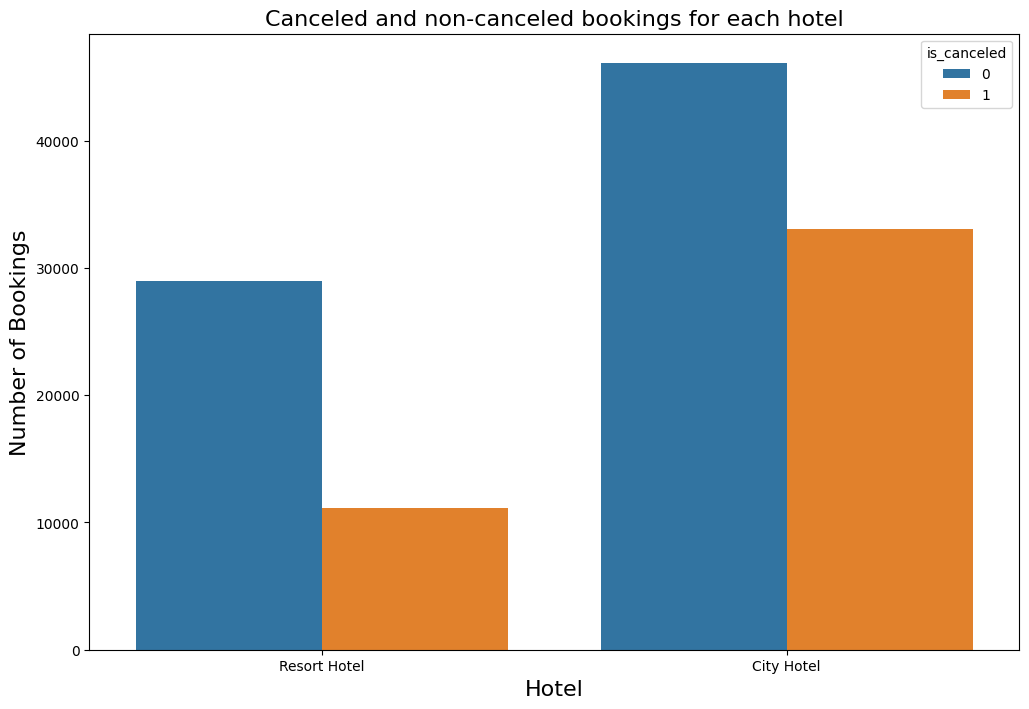

In [26]:
# Let's find out number of cancelled booking and then plot a bar chart for cancelled and no cancelled bookings for each hotel
canceled_bookings = df[df["is_canceled"] == 1]
no_canceled_bookings = df[df["is_canceled"] == 0]

# Let's plot a bar chart for cancelled and no cancelled bookings for each hotel
plt.figure(figsize=(12, 8))
sns.countplot(x="hotel", hue="is_canceled", data=df)
plt.title("Canceled and non-canceled bookings for each hotel", fontsize=16)
plt.xlabel("Hotel", fontsize=16)
plt.ylabel("Number of Bookings", fontsize=16)
plt.show()

In [27]:
# Calculate canceled booking percentage for each hotel
canceled_percentage = (
    canceled_bookings["hotel"].value_counts(
    ) / df["hotel"].value_counts() * 100
).round(2)

# Create a DataFrame with hotel and cancellation percentage
canceled_df = canceled_percentage.reset_index()

# Rename the columns for clarity
canceled_df.columns = ["Hotel", "Cancellation Percentage"]

# Display the result without the index column
print(canceled_df.to_string(index=False))

       Hotel  Cancellation Percentage
  City Hotel                    41.79
Resort Hotel                    27.77


We can see that around 40% of the cancelled bookings were of `City Hotel`. <br />

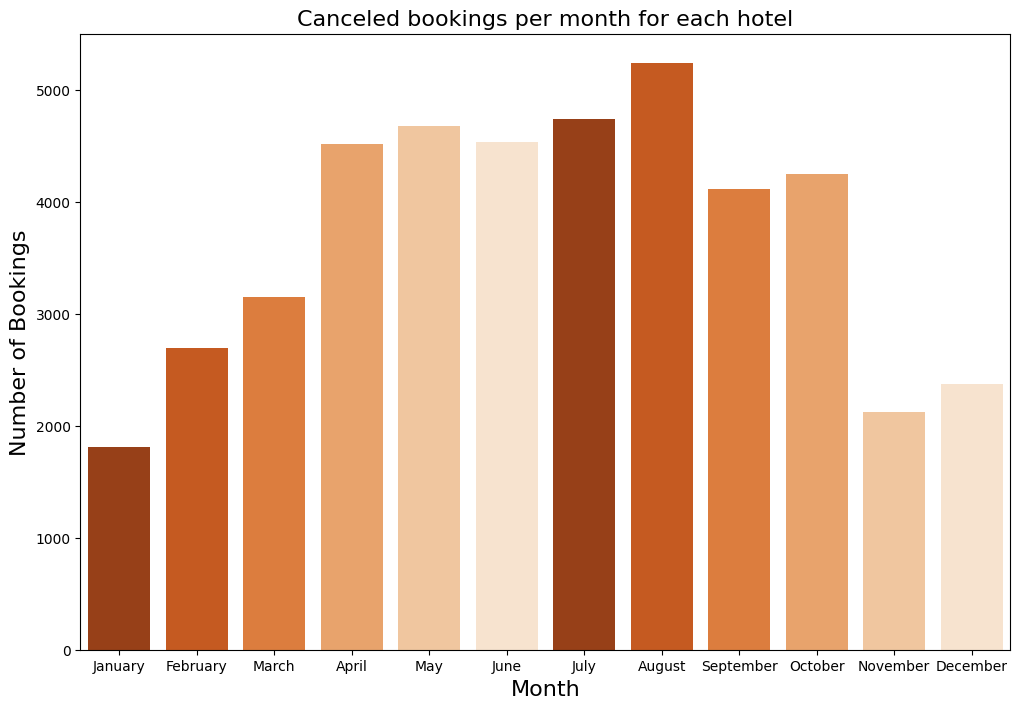

In [28]:
# Let's see number of cancelled booking per month for each hotel also make the month order logical
canceled_bookings_per_month = canceled_bookings["arrival_date_month"].value_counts(
)
canceled_bookings_per_month = canceled_bookings_per_month.reindex(
    ordered_months, axis=0
)

# Let's plot a bar chart for cancelled bookings per month for each hotel
plt.figure(figsize=(12, 8))
sns.barplot(
    x=canceled_bookings_per_month.index,
    y=canceled_bookings_per_month.values,
    palette=palette,
)

plt.title("Canceled bookings per month for each hotel", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Bookings", fontsize=16)
plt.show()

We can conclude that most of the cancelled booking are in the month of `August` followed by `July` for both the hotels.

Q. **In which hotel people like to stay and spend more time.**

We will analyze the duration of hotel stays on weekdays and weekends separately. This distinction is important because we may observe variations in the distribution. To begin, we will create boxplots segmented by market type, focusing initially on stays during weekdays. The market segment categorization will provide insights into the nature of these stays

<AxesSubplot: xlabel='market_segment', ylabel='stays_in_week_nights'>

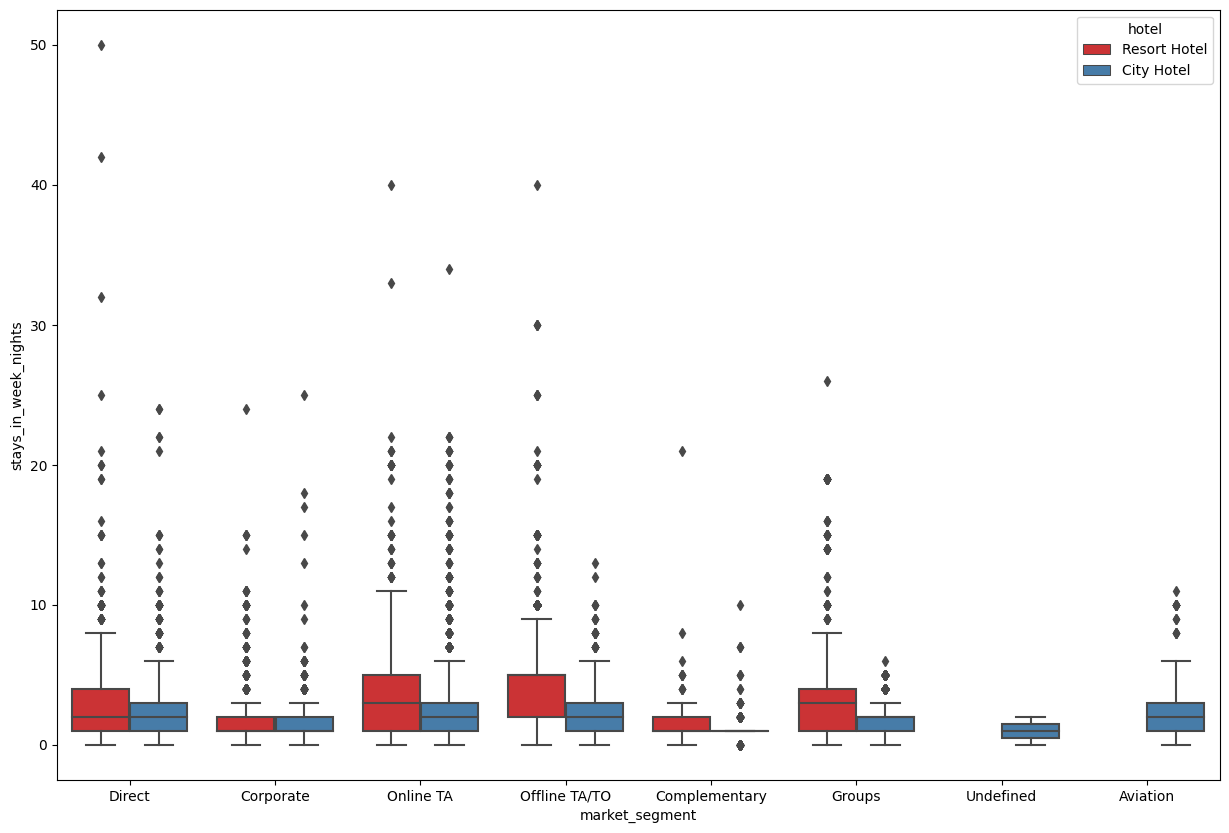

In [29]:
# Let's plot a boxplot to visualize the number of days stayed by market segment and hotel type
plt.figure(figsize=(15, 10))
sns.boxplot(
    x="market_segment", y="stays_in_week_nights", data=df, hue="hotel", palette="Set1"
)

Now, we will proceed to create boxplots categorized by market segment, specifically focusing on stays during weekends

<AxesSubplot: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

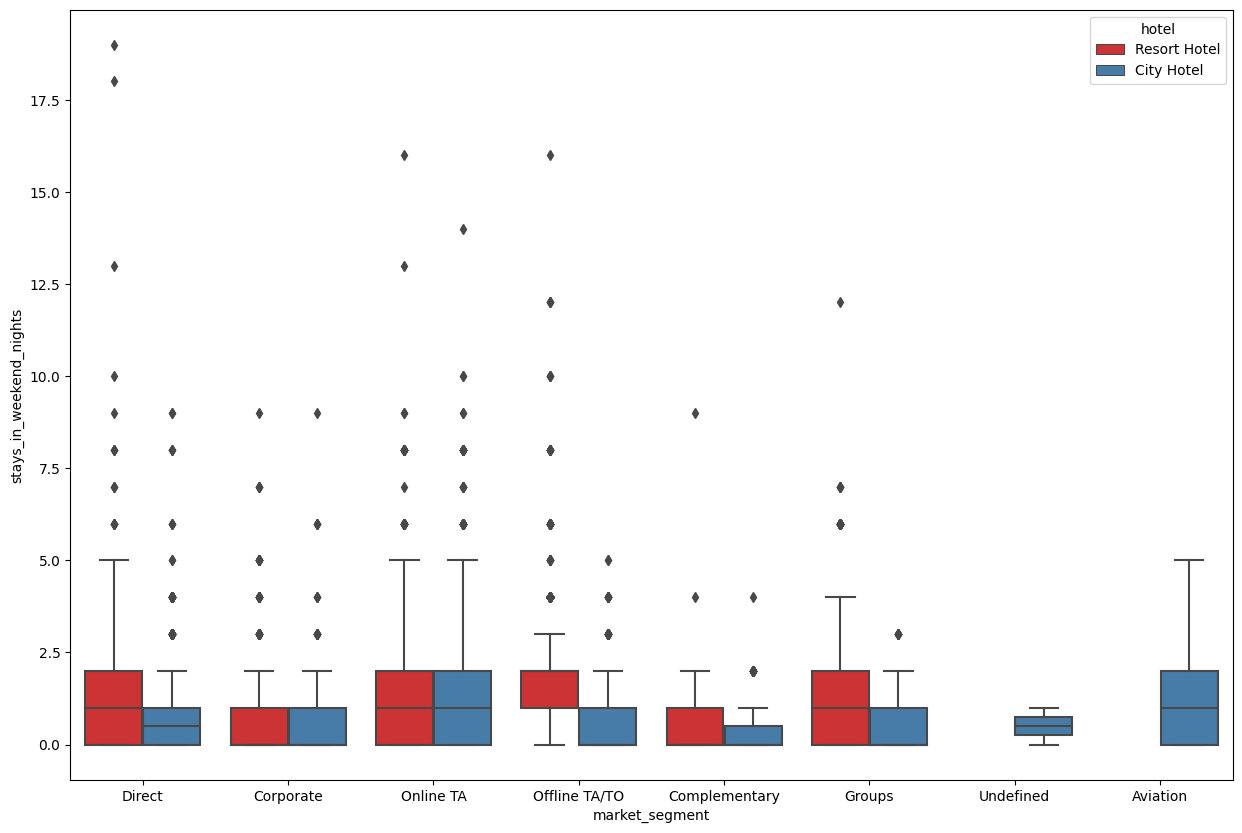

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(
    x="market_segment",
    y="stays_in_weekend_nights",
    data=df,
    hue="hotel",
    palette="Set1",
)

Insight 1: **Duration of Hotel Stays**  <br />
It is evident from the data that most guest groups exhibit a normal distribution of stay durations, although some groups display a notable skewness in their distribution. Upon examining the data, it becomes apparent that the majority of guests do not extend their hotel stays beyond one week. However, it is worth noting that staying at resort hotels for up to 12–13 days appears to be relatively common. This pattern varies slightly among different market segments, but in all cases, staying longer than 15 days can be considered an outlier. Combining weekend and weeknight stays into a 'total time' feature could provide further clarity, but this observation becomes evident when reviewing the visualizations together.

Insight 2: **Customer Behavior in the Aviation Segment** <br />
Interestingly, customers from the Aviation Segment do not appear to favor resort hotels and tend to have a lower average length of stay. Furthermore, the averages for weekends and weekdays are roughly equal, indicating that customers in this segment are likely to have shorter stays, possibly due to business-related travel. Additionally, it is worth noting that airports are often located closer to city hotels, which could explain this pattern.

Insight 3: **Longer Stays in Resort Hotels** <br />
On the other hand, when guests opt for resort hotels, they tend to extend their stays. This observation aligns with the earlier insight that longer stays are more common in resort hotels, particularly for leisure-oriented trips.

Q. **Which was the most booked accommodation type (Single, Couple, Family)**

For this question, we will create 3 categories for more specific analysis: <br />
* Single - 1 Adult
* Couple - 2 Adults
* Family - 3 or more Adults or 1 or more Children

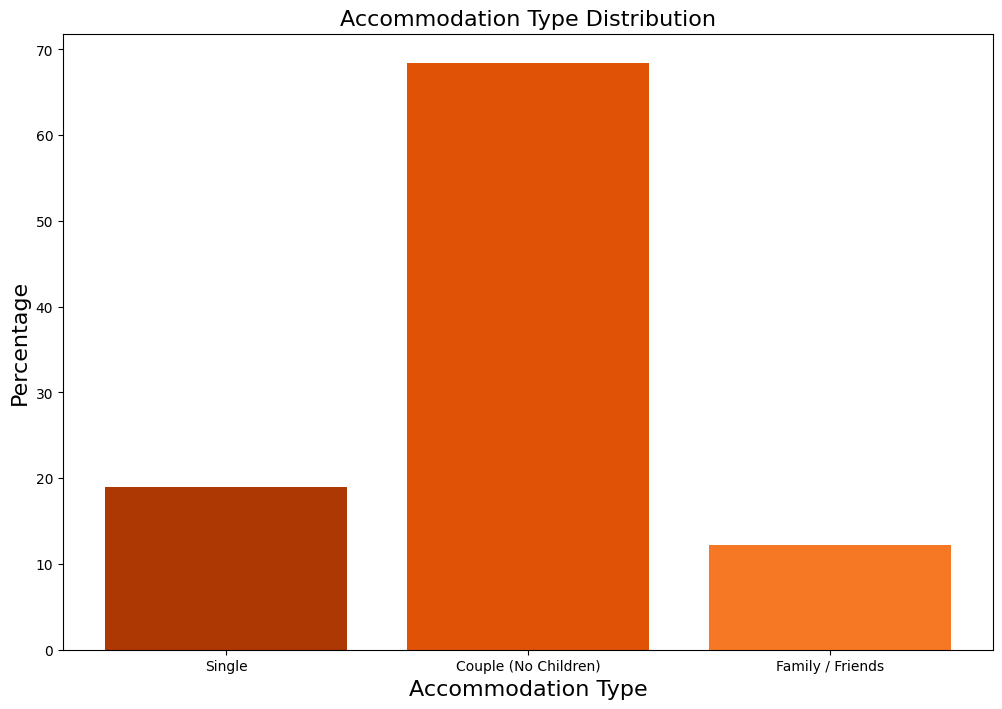

In [31]:
# Create subsets for different accommodation categories
single_guests = df[(df.adults == 1) & (df.children == 0) & (df.babies == 0)]
couple_guests = df[(df.adults == 2) & (df.children == 0) & (df.babies == 0)]
family_guests = df[df.adults + df.children + df.babies > 2]

# Define category names and calculate their percentages
category_names = ['Single', 'Couple (No Children)', 'Family / Friends']
category_counts = [single_guests.shape[0],
                   couple_guests.shape[0], family_guests.shape[0]]
category_percentages = [count / df.shape[0] * 100 for count in category_counts]

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(category_names, category_percentages, color=palette)
plt.title('Accommodation Type Distribution', fontsize=16)
plt.xlabel('Accommodation Type', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.show()

As we can observe, Couple (or 2 adults) is the most popular accommodation type. 

Q. **What are the busiest months for hotel bookings?**

In [36]:
# Let's find out the busiest month for hotel and also find out the number of guests in each month
# Create a new dataframe with the required columns
guests_per_month = df[['hotel', 'arrival_date_month',
                       'arrival_date_year', 'adults', 'children', 'babies']].copy()

# Create a new column for total guests
guests_per_month['total_guests'] = guests_per_month['adults'] + \
    guests_per_month['children'] + guests_per_month['babies']

# Group by hotel and arrival date month and year
guests_per_month = guests_per_month.groupby(
    ['hotel', 'arrival_date_year', 'arrival_date_month']).sum().reset_index()


# Let's arrange them in ascending order of total guests
guests_per_month = guests_per_month.sort_values(
    'total_guests', ascending=False)
guests_per_month.head(5)

,hotel,arrival_date_year,arrival_date_month,adults,children,babies,total_guests
25,City Hotel,2017,May,8287,235,10,8532
16,City Hotel,2016,October,7755,336,13,8104
18,City Hotel,2017,April,7619,448,13,8080
23,City Hotel,2017,June,7507,347,11,7865
7,City Hotel,2016,August,6904,730,26,7660


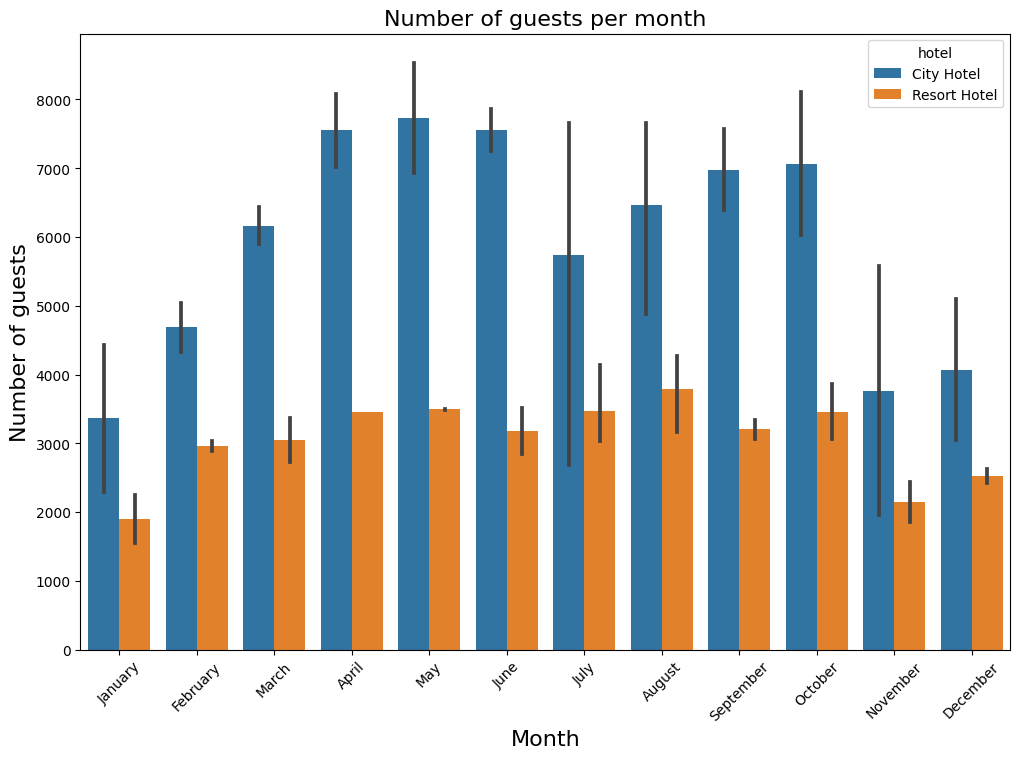

In [39]:
# Create a list of month names in chronological order
months_in_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# Create a new dataframe with the required columns
guests_df = df[
    ["hotel", "arrival_date_month", "arrival_date_year", "adults", "children", "babies"]
].copy()

# Calculate the total number of guests for each booking
guests_df["total_guests"] = (
    guests_df["adults"] + guests_df["children"] + guests_df["babies"]
)

# Group by hotel, arrival date month, and year, and calculate the total guests
guests_per_month = (
    guests_df.groupby(["hotel", "arrival_date_year", "arrival_date_month"])
    .sum()
    .reset_index()
)

# Arrange the months in chronological order
guests_per_month["arrival_date_month"] = pd.Categorical(
    guests_per_month["arrival_date_month"], categories=months_in_order, ordered=True
)

# Sort the DataFrame by year and month
guests_per_month = guests_per_month.sort_values(
    ["arrival_date_year", "arrival_date_month"]
)

# Plot a chart to visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(
    x="arrival_date_month",
    y="total_guests",
    hue="hotel",
    data=guests_per_month,
    hue_order=["City Hotel", "Resort Hotel"],
)
plt.title("Number of guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of guests", fontsize=16)
plt.xticks(rotation=45)
plt.show()

The graph reveals that for the `City Hotel`, the highest number of bookings occur during the spring and autumn months. In contrast, the `Resort Hotel` experiences its peak booking periods primarily in the autumn season. <br />
Notably, despite the variation in peak booking months, the city hotel consistently maintains a substantially higher overall booking volume compared to the resort hotel. This observation suggests a clear preference among guests for the city hotel as their preferred accommodation choice